### Vienna Zhang & Edgar Horna

# New York City Income Distribution Analysis

Data Bootcamp Final Project - Fall 2018

## Outline

This project aims to analyze demographic, social, and economic markers in the 5 boroughs of NYC to figure out the factors that most influence income disparity within NYC. We also compare several of these markers to NY State as a whole and the United States. We hope to provide clarity to what drives income disparity in NYC. In conjunction with the American Community Survey, we experimented with looking into several aspects of dataframe, to find the possible relationship between New York City's Income Distribution between Race, Gender, Education, which are the reasonable hypothesis to draw to influence the income, due to various historical reasons.

## Set up

### Importing packages

In [600]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.style.use('ggplot')

# check Python version 
import datetime as dt 
import sys
print('Today is', dt.date.today())
print('What version of Python are we running? \n', sys.version, sep='')

Today is 2018-12-22
What version of Python are we running? 
3.6.5 |Anaconda, Inc.| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


### Introduction

Income equality is an extremely interesting and sensitive topic to dissect. An article from CNBC(https://www.cnbc.com/2018/07/19/income-inequality-continues-to-grow-in-the-united-states.html) highlights the growing gap between the bottom 1% percent earners and the top 1% earners in the United States. A shrinking middle class is definitely a cause for concern and a potential marker for future economic turmoil. Understanding the underlying issues or drivers could help in figuring out how to reduce this inequality.
	As a city full of high earners such as bankers and lawyers mixed with everyday retail workers, NYC serves as an excellent area to study income inequality. We chose to use 1 Year ACS or American Community Survey data to look at several factors that could influence income inequality

### Retrieving data

Now we import the data from excel and csv to jupyter notebook as dataframes.df_acssoc is American Community Survey data on social, dfacsecon is on economics, and dfacsdemo is on demographics; dfwage is the Wage Distribution, dfrace is the Wage by Race & Ethnicity in Common Jobs, dfgender is Wage by Gender in Common Jobs. Looking through the dataset, we realize that the data from 2016 is the most recent and comparably more complete, so we decide to filter the data by year 2016.

In [7]:
df_acssoc=pd.read_excel('/Users/viennazhang/Desktop/Data Final Files/soc_2016acs1yr_nyc.xlsx')
df_acsecon = pd.read_excel('/Users/viennazhang/Desktop/Data Final Files/econ_2016acs1yr_nyc.xlsx')
df_acsdemo = pd.read_excel('/Users/viennazhang/Desktop/Data Final Files/demo_2016acs1yr_nyc.xlsx')

In [289]:
dfwage = pd.read_csv('/Users/viennazhang/Desktop/Data Final Files/Data USA - Bar Chart of Wage Distribution in New York, Ny.csv')
dfrace = pd.read_csv('/Users/viennazhang/Desktop/Data Final Files/Data USA - Bar Chart of Wage by Race & Ethnicity in Common Jobs in New York, Ny-3.csv')
dfgender = pd.read_csv('/Users/viennazhang/Desktop/Data Final Files/Data USA - Bar Chart of Wage by Gender in Common Jobs in New York, Ny.csv')

### Cleaning the dataframe

#### Removing Unneeded Columns

We saw that the data set had many issues before we could seamlessly use it. The first issue was that it had unnecessary columns for the sake of this analysis. After the primary data cell for each borough, there was a margin of error, percent of total , and a margin of error for percent.
We chose to remove this to make the data easier to read and any percents we wanted to caclulate could easily be done in excel.

In [8]:
df_acssoc_clean = df_acssoc.drop(['Bronx .1','Bronx .2','Bronx .3','Brooklyn.1','Brooklyn.2','Brooklyn.3','Manhattan.1','Manhattan.2','Manhattan.3','Queens .1','Queens .2','Queens .3','Staten Island.1','Staten Island.2','Staten Island.3','New York city.1','New York city.2','New York city.3'],axis = 1)
df_acsdemo_clean = df_acsdemo.drop(['Bronx .1','Bronx .2','Bronx .3','Brooklyn.1','Brooklyn.2','Brooklyn.3','Manhattan.1','Manhattan.2','Manhattan.3','Queens .1','Queens .2','Queens .3','Staten Island.1','Staten Island.2','Staten Island.3','New York city.1','New York city.2','New York city.3'],axis = 1)
df_acsecon_clean = df_acsecon.drop(['Bronx.1','Bronx.2','Bronx.3','Brooklyn.1','Brooklyn.2','Brooklyn.3','Manhattan.1','Manhattan.2','Manhattan.3','Queens .1','Queens .2','Queens .3','Staten Island.1','Staten Island.2','Staten Island.3','New York city.1','New York city.2','New York city.3'],axis = 1 )

We then took out the first row of each data set to make it look cleaner

In [9]:
df_acssoc_clean = df_acssoc_clean.drop(index=0,axis=0)
df_acsecon_clean = df_acsecon_clean.drop(index=0,axis=0)
df_acsdemo_clean = df_acsdemo_clean.drop(index=0,axis=0)

We only need the data from year 2016 in data set dfgender

In [384]:
dfgender2016 = dfgender.iloc[1877:2819]

#### Replacing NAs With Blanks

The excel data set originally had many rows with NAs, because in the excel file, catagory names were used before each set of data. For example, in df_acssoc, "HOUSEHOLD BY TYPE", "SCHOOL ENROLLMENT"... etc. were used to divide each section of data. After importing them into Jupyter Notebook, all of them turned into NAs. To remove all the NAs but keep the catagory name, we chose to replace all the NA cells with blanks.

In [10]:
df_acssoc_clean = df_acssoc_clean.fillna('')
df_acsecon_clean = df_acsecon_clean.fillna('')
df_acsdemo_clean = df_acsdemo_clean.fillna('')

Finally we set the index to be the first column which contains all the data identifiers 

In [11]:
df_acsecon_clean=df_acsecon_clean.set_index('Subject')
df_acsdemo_clean=df_acsdemo_clean.set_index('Subject')
df_acssoc_clean=df_acssoc_clean.set_index('Subject')

#### Creating a Second Data Frame

Finally we created a tranposed version of each data set to facilitate any analysis we will do. Depending on which axis we want to use, we can call on a different data frame.

In [12]:
df_acsecon_clean2 = df_acsecon_clean.transpose()
df_acsdemo_clean2 = df_acsdemo_clean.transpose()
df_acssoc_clean2 = df_acssoc_clean.transpose()

## Income Distribution on Economics, Social, and Demographics Aspects

### I. Income

We first start off by looking at a distribution of income in 2016. This is fairly easy as there is a mean income row within the dataset so we just create a graph for this information with appropriate labels and such. (77 is the row index of medium income)

Text(0.5,1,'Household Income')

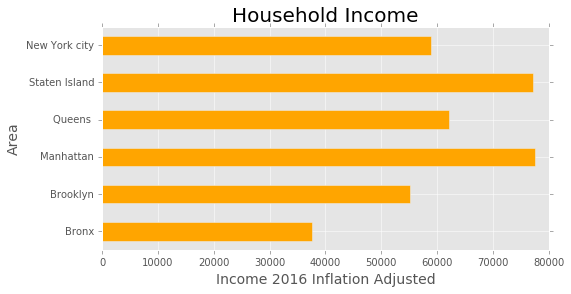

In [448]:
fig, ax = plt.subplots(1,figsize = (8,4))
df_acsecon_clean.iloc[77].plot(kind='barh', color = 'orange')
ax.set_xlabel('Income 2016 Inflation Adjusted', size = 14)
ax.set_ylabel('Area', size = 14)
ax.set_title('Household Income', size = 20)

We had expected Manhattan to have the highest median income but we were actually very suprised that Staten Island came extremely close. We had also predicted that the Bronx would have the lowest income.
Right from the start we can already see inequality from the boroughs. Although this disparity is mostly captured by the Bronx as Brooklyn and Queens do not lag that far behind. 

Text(0.5,1,'Income Per Capita')

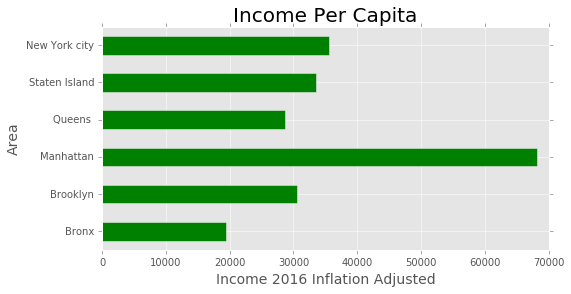

In [447]:
fig, ax = plt.subplots(1,figsize = (8,4))
df_acsecon_clean.iloc[107].plot(kind='barh', color = 'green')
ax.set_xlabel('Income 2016 Inflation Adjusted', size = 14)
ax.set_ylabel('Area', size = 14)
ax.set_title('Income Per Capita', size = 20)

Income Per Capita shows a much more clear difference between the boroughs. Manhattan is heavily in the lead with nearly 2x the income per capita then the closest in Staten Island. This did not suprise us at all as Manhattan is the financial capital of the world. 

### II. Race

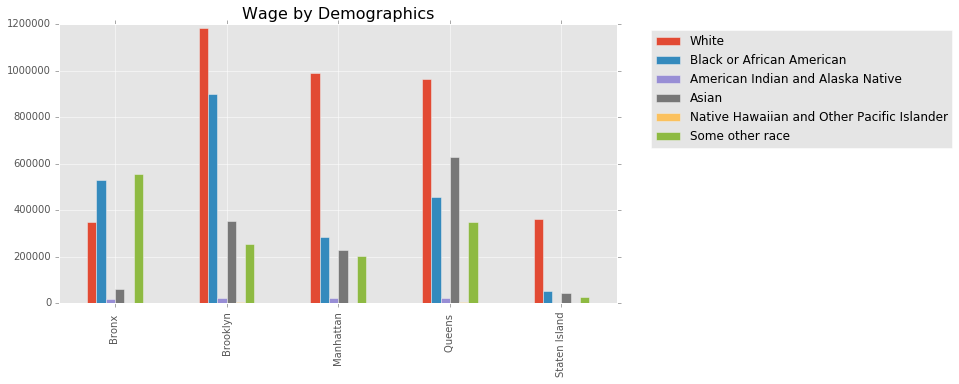

In [511]:
racelist = df_acsdemo_clean.iloc[69:75]
racelist = racelist.transpose()
racelist = racelist.replace('N',0) #otherwise it won't graph anything with N
fig, ax = plt.subplots(1,figsize = (10,5))
racelist.iloc[0:5].plot.bar(ax = ax)
ax.set_title('Wage by Demographics', size =16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

We sliced the race information from df_acsdemo, creating a racelist to avoid any dupicate names disturbing the result.
New York City has a population of 8.34 million people, 31.1% white, 29.2% Hispanic, and 22% black. The bar graph shows the income distribution by demographics in 5 boroughs.

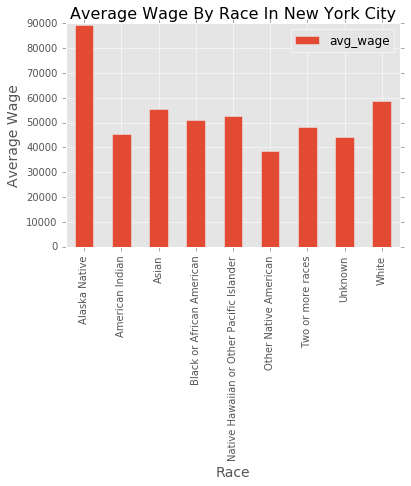

In [523]:
fig,ax = plt.subplots(1, figsize=(6,4))
race_avg_wage = dfrace.groupby('race_name')[['avg_wage']].mean()
race_avg_wage.plot.bar(ax=ax)
ax.set_xlabel('Race', size = 14)
ax.set_ylabel('Average Wage', size = 14)
ax.set_title('Average Wage By Race In New York City', size = 16)
plt.show()

### III. Education

#### Creating new percentages columns

In [517]:
df_acssoc_clean2['High School Grad %']=df_acssoc_clean2["High school graduate (includes equivalency)"]/df_acssoc_clean2["Population 25 years and over"]
df_acssoc_clean2['Some College %']=df_acssoc_clean2["Some college, no degree"]/df_acssoc_clean2["Population 25 years and over"]
df_acssoc_clean2['Associate  %']=df_acssoc_clean2["Associate's degree"]/df_acssoc_clean2["Population 25 years and over"]
df_acssoc_clean2['Bachelor %']=df_acssoc_clean2["Bachelor's degree"]/df_acssoc_clean2["Population 25 years and over"]
df_acssoc_clean2['Grad %']=df_acssoc_clean2["Graduate or professional degree"]/df_acssoc_clean2["Population 25 years and over"]                             

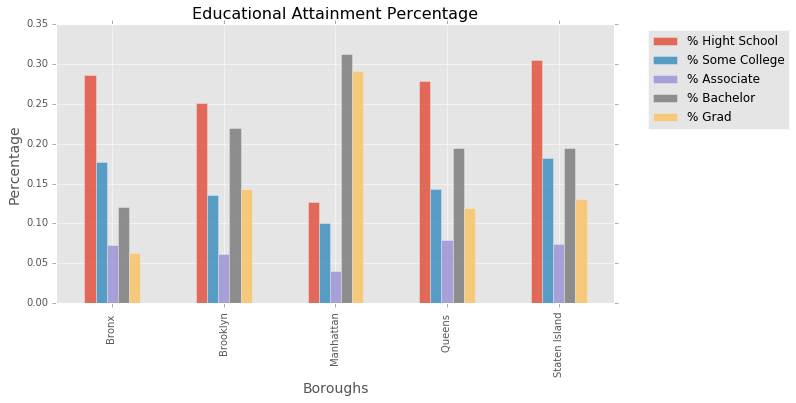

In [697]:
fig, ax = plt.subplots(1,figsize = (10,5))
df_acssoc_clean2[df_acssoc_clean2.columns[196:201]].iloc[0:5].plot.bar(ax = ax, alpha=0.8,legend=True)
ax.set_xlabel('Boroughs', size = 14)
ax.set_ylabel('Percentage', size = 14)
ax.set_title('Educational Attainment Percentage', size = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, labels = ['% Hight School', '% Some College', '% Associate', '% Bachelor', '% Grad'])
plt.show()

### IV. New York City Wage vs. United States Wage

#### New York City Wage Distribution in 2016

In [705]:
dfwage.iloc[105:126]

,year,geo_name,geo,num_ppl,num_ppl_moe,wage_bin_name,wage_bin
105,2016,New York,04000US36,996845,19341.80,< 10K,A
106,2016,New York,04000US36,1191814,22936.70,$10-20K,B
107,2016,New York,04000US36,1172379,23897.80,$20-30K,C
108,2016,New York,04000US36,1045779,23155.00,$30-40K,D
109,2016,New York,04000US36,861301,16600.80,$40-50K,E
110,2016,New York,04000US36,770060,17395.10,$50-60K,F
111,2016,New York,04000US36,613117,16130.20,$60-70K,G
112,2016,New York,04000US36,470976,14580.00,$70-80K,H
113,2016,New York,04000US36,380726,11040.00,$80-90K,I
114,2016,New York,04000US36,250740,11143.40,$90-100K,J


#### United States Wage Distribution in 2016

In [706]:
dfwage.iloc[84:104]

,year,geo_name,geo,num_ppl,num_ppl_moe,wage_bin_name,wage_bin
84,2016,United States,01000US,18071160,89673.70,< 10K,A
85,2016,United States,01000US,20389119,109928.00,$10-20K,B
86,2016,United States,01000US,21371186,100891.00,$20-30K,C
87,2016,United States,01000US,19001439,108440.00,$30-40K,D
88,2016,United States,01000US,15123581,73733.30,$40-50K,E
89,2016,United States,01000US,11847222,65888.40,$50-60K,F
90,2016,United States,01000US,9088557,58643.90,$60-70K,G
91,2016,United States,01000US,6593885,56388.10,$70-80K,H
92,2016,United States,01000US,5084130,47397.40,$80-90K,I
93,2016,United States,01000US,3440709,37080.20,$90-100K,J


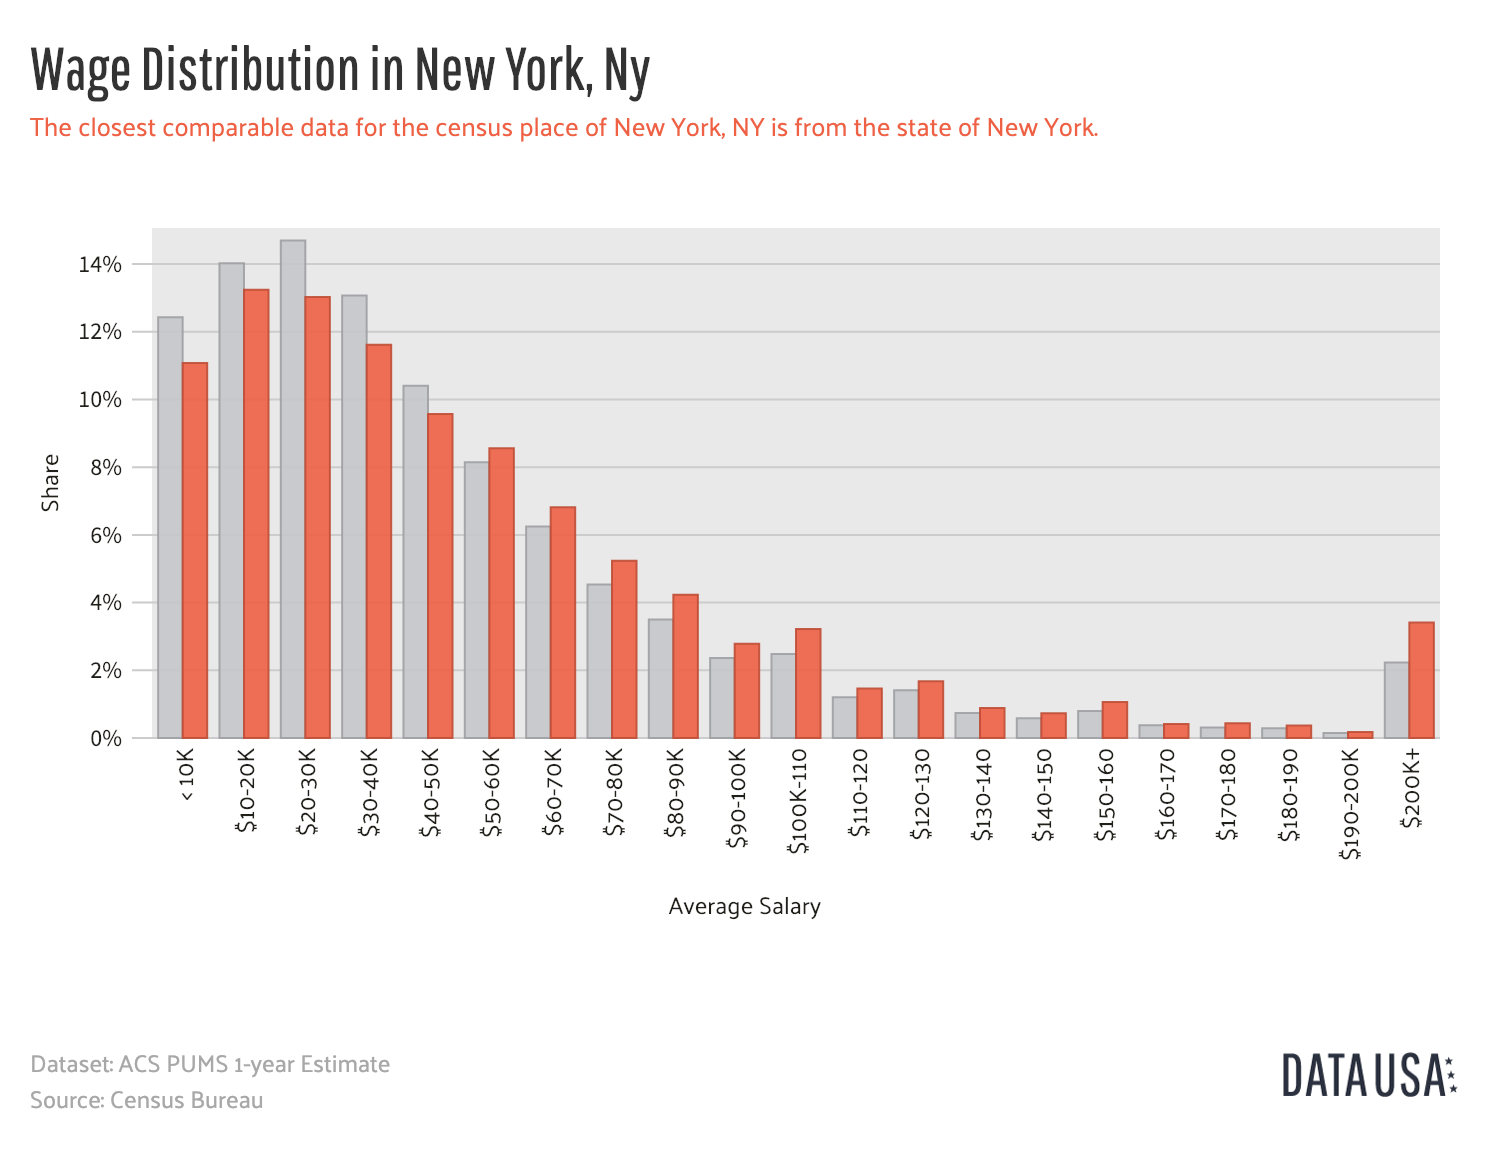

Red bars represent New York City, and grey bars represent United States. The image came from Data USA, URL:https://datausa.io/profile/geo/new-york-ny/#economy

### V. Industry

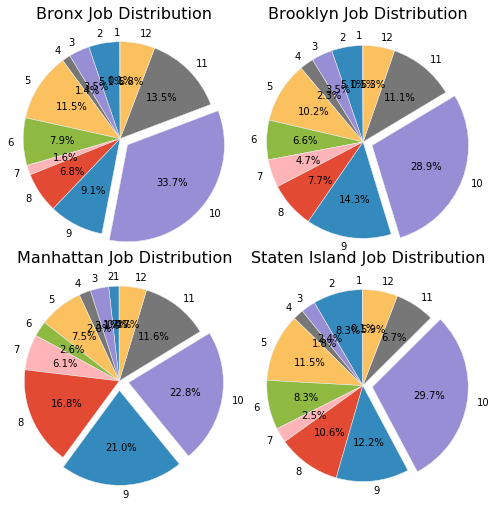

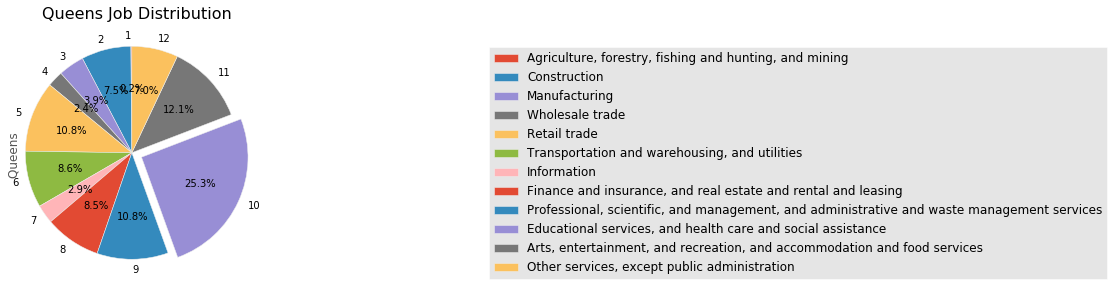

In [710]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
labels='1','2','3','4','5','6','7','8','9','10','11','12'
explode1 = (0,0,0,0,0,0,0,0,0,0.1,0,0)
axs[0,0].pie(df_acsecon_clean['Bronx'].iloc[44:56], labels=labels, explode = explode1, 
             autopct='%1.1f%%', shadow=False,startangle = 90)
axs[0,0].set_title('Bronx Job Distribution\n', size=16)
axs[0,0].axis('equal')

explode2 = (0,0,0,0,0,0,0,0,0,0.1,0,0)
axs[0,1].pie(df_acsecon_clean['Brooklyn'].iloc[44:56],labels=labels, explode = explode2, 
             autopct='%1.1f%%',shadow=False,startangle = 90)
axs[0,1].set_title('Brooklyn Job Distribution\n', size=16)
axs[0,1].axis('equal')

explode3 = (0,0,0,0,0,0,0,0,0.1,0.1,0,0)
axs[1,0].pie(df_acsecon_clean['Manhattan'].iloc[44:56],labels=labels, explode = explode3, 
             autopct='%1.1f%%', shadow=False,startangle = 90)
axs[1,0].set_title('Manhattan Job Distribution\n', size=16)
axs[1,0].axis('equal')

explode4 = (0,0,0,0,0,0,0,0,0,0.1,0,0)
axs[1,1].pie(df_acsecon_clean['Staten Island'].iloc[44:56],labels=labels, explode = explode4, 
             autopct='%1.1f%%', shadow=False,startangle = 90)
axs[1,1].set_title('Staten Island Job Distribution\n', size=16)
axs[1,1].axis('equal')

fig, ax = plt.subplots()
explode5 = (0,0,0,0,0,0,0,0,0,0.1,0,0)
df_acsecon_clean['Queens '].iloc[44:56].plot(kind='pie',labels=labels, explode = explode5, 
                                             autopct='%1.1f%%',shadow = False, startangle = 90,figsize=(4,4))
ax.set_title('Queens Job Distribution\n', size=16)
ax.axis('equal')
plt.legend(bbox_to_anchor=(2.05, 1), loc=2, labels = ['Agriculture, forestry, fishing and hunting, and mining', 'Construction', 'Manufacturing', 'Wholesale trade', 'Retail trade','Transportation and warehousing, and utilities',
                                                     'Information','Finance and insurance, and real estate and rental and leasing','Professional, scientific, and management, and administrative and waste management services',
                                                     'Educational services, and health care and social assistance','Arts, entertainment, and recreation, and accommodation and food services','Other services, except public administration',
                                                     'Public administration'])

plt.show()

### VI. Gender

In [527]:
dfgender2016 = dfgender.iloc[1877:2819]
total = dfgender2016.groupby('soc_name')['num_ppl'].sum()
dict_male = {}
for index, row in dfgender2016.iterrows():
    if row['sex_name'] == 'Male':
        dict_male[row['soc_name']] = row['num_ppl']
        avg = row['avg_wage_ft'] if row['avg_wage_ft'] != 'None' else 0
        dict_male[row['soc_name'] + '_avg_wage'] = float(avg)
percentages = {'soc_name':[], 'percent_male':[], 'avg_wage':[]}
for index, value in total.iteritems():
    percentages['soc_name'].append(index)
    percentages['percent_male'].append(dict_male[index] / value)
    percentages['avg_wage'].append(dict_male[index + '_avg_wage'])
p_m_df = pd.DataFrame(percentages)

In [526]:
print(smf.ols('percent_male ~ avg_wage',data=p_m_df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           percent_male   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.071
Date:                Sat, 22 Dec 2018   Prob (F-statistic):              0.151
Time:                        02:43:33   Log-Likelihood:                -58.436
No. Observations:                 478   AIC:                             120.9
Df Residuals:                     476   BIC:                             129.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6637      0.025     26.053      0.0

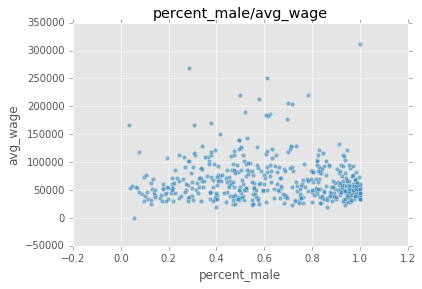

In [445]:
p_m_df.plot.scatter(y='avg_wage',x='percent_male',alpha=.60, title = 'percent_male/avg_wage')

We try to do an OLS regression test on male average wage regression on male percentage, and female percentage would just be 1-(male percentage). While we initially believed gender was a strong factor in income inequality, however, from the OLS regression, the extremely low R squared and low absolute t value leads us to believe that gender's role is not as significant as we thought it would be in income inequality. We found this result odd because of the disparity between the average wage of men and women in the data set. We believe further investigation is needed for more precise result.

## Observations

##### I. Income
Both Household income and Income per Capita revealed the income inequality present within New York City. 

##### II. Race
We then decided to look at the distribution of races within the 5 boroughs. The dataset we had separated out into White, Black or African American, American Indian and Alaska Native, Asian or Native Hawaiian and Other Pacific Islander. 
We found that Manhattan is largely comprised of White People and heavily lacked the other races. Brooklyn and Queens had a decent mixture with Queens possessing a strong asian presence with Flushing.
To further bolster our thoughts behind race and income inequality, we looked at another data set that had an average wage for every possible category for each possibly race in New York City. We grouped the data by race and wage and arrived at an average wage per race. We did not expect to find Alaska Native having the highest Average Wage by far and even found there to be a significant sample size behind this. Despite the relatively significant correlation, we found between race distribution and income inequality within the boroughs, when you account for a job, these differences seemingly disappear. All of the average wages we found were within 10 to 15% of each other, except for Alaska Native as mentioned prior.

##### III. Education
Education is highly linked with income and is likely to be one of the most important drivers of inequality. Even entry-level jobs today require a Bachelor’s degree and acquiring some of the highest payest jobs needs even higher level education. From our dataset, we took the number of total individuals that had attained several levels of education and then found the percentage that each of these brackets made up per borough.
	
Our findings fit in line with our expectations very well. From the graphs, Manhattan by far has the highest percentage of its residents possessing Bachelors and Graduate or higher degrees for those above the age of 25. These two brackets far surpass the brackets of those that did not complete college degree or even just finished high school. Every other borough within Manhattan has a higher percentage of high school graduates compared to higher level education. Interestingly enough, Staten Island also fits this trend despite having nearly as high a median as Manhattan.
Clearly, education has a strong effect on income.

##### IV. New York City Wage vs. United States Wage
We then sought to compare the distribution and density of wages within New York City and the United States as a whole. Using a dataset from the ACS or American Community Survey, we found that the greatest frequency of jobs occurred at the lowest possibly wages levels. This definitely does not bode as these level of wages are below the poverty line. Also, In New York City, it seems that there is a greater portion of individuals earning above 200k, then there are within all other wage brackets except those less than 20k. This points to definite inequality within New York City, especially when this trend does not exist as strongly within the United States as a whole. 

##### V. Industry & VI. Gender
We then decided to look at the distribution of jobs by industry within the five boroughs to uncover what effect this might have on income inequality. WIthin our expectations, we found that finance, professional, and education and healthcare made up the greatest portion of workers within Manhattan. As most of these careers require higher education, this falls in line with the data we uncovered about education attainment above. An interesting trend we uncovered was that the Educational services, and health care and social assistance industry were the largest in all five boroughs.

A potential explanation behind this could be the rather large portion of jobs that this umbrella term could cover. We were limited by our data set in terms of how we detailed we could parse out the various types of roles that could be under this phrase. Despite this, we can draw some conclusions from this analysis. It seems that the other boroughs besides Manhattan have a very similar distribution amongst jobs in these industries. As we had predicted, the differentiating factor is the extremely high paying jobs available within the Finance Industry and within the Professional industry. This definitely calls to question whether these jobs are too highly overpaid relative to lower wage earners.


## Conclusion

We were able to show the income inequality in New York City, and how the income distribution is correlated with Race, specically, Black, White, Asian, Native Indian and Native Hawaiin; educational attainment, specially, high school, some college, Associates, Bachelors and Graduates; also with industry catagories and gender. The result showed was interesting and could serve as a foundation for us to further explore topics like how to minimzie the income gap between rich and poor in NYC. Although we tried to cover as thouroughly as possible, the spectrum of this analysis report is limited. The dataset were not large enough for us to comprehensively construct OLS/Probit/Logit regression, thus for example, our OLS regression of gender on the average wage displayed a very insignificant result. Ideally, if big enough and consistent data on all aspects we analyzed on were avaible, we could do a comprehensive regression(OLS&Logit&Probit) on what factors contribute to NYC income disparity, using gender as a dummy variable, race, education and industry as control variables, if we'd like to dive deeper into this topic.

## Reference

#### Bibliography

Reinicke, Carmen. "US income inequality continues to grow", July 19 2018, CNBC
https://www.cnbc.com/2018/07/19/income-inequality-continues-to-grow-in-the-united-states.html

#### Data

1. NYC Open Data. Demographic Profile of ACS 1 Year Estimates at the New York City and Borough level. https://data.cityofnewyork.us/City-Government/Demographic-Profile-of-ACS-1-Year-Estimates-at-the/w7kn-7zx2
2. Data USA: New York,NY. https://datausa.io/profile/geo/new-york-ny/#economy

### Github Link: 
https://github.com/ViennaZhang/Zhang_Final_Project